# Question 1 


### a) Show the implementation of a concurrent depth-first crawler (No. of threads = 5 and depth = 5). 

## Architecture 

####  Take 5 URLS from base website and assign them to 5 threads. The threads will use their base URL to recursively find subtrees. 

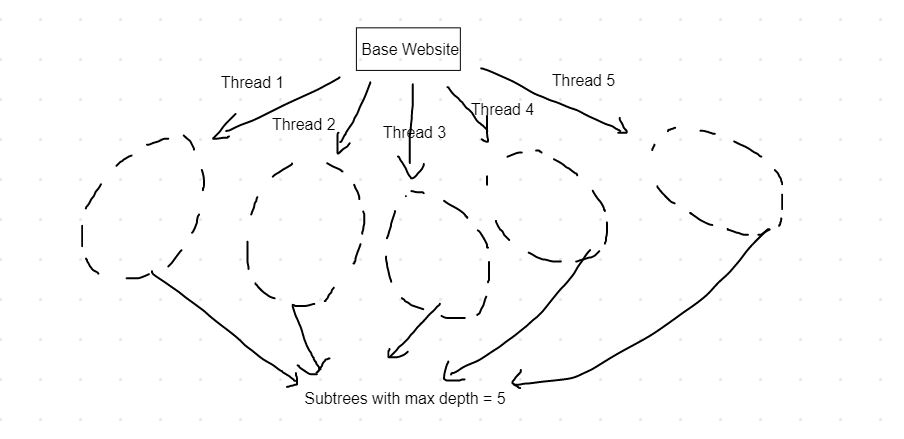

In [1]:
import requests
from urllib.parse import urlparse, urljoin
from bs4 import BeautifulSoup
import threading
import os

def is_valid(url):
    
    parsed = urlparse(url)
    return bool(parsed.netloc) and bool(parsed.scheme)

#make function to collect first 5 links from base website

visited = ["https://vit.ac.in/"]
def collect5(url, visited):
    soup = BeautifulSoup(requests.get(url).text, "html.parser")
    for link in soup.find_all("a"):
        href = link.get("href")
        if href not in visited and len(visited)<5 and is_valid(href):
            visited.append(href)
collect5("https://vit.ac.in/", visited)
visited

['https://vit.ac.in/',
 'http://chennai.vit.ac.in/',
 'https://vitap.ac.in/',
 'https://vitbhopal.ac.in/',
 'https://admissions.vit.ac.in/btech/']

In [ ]:
visited = {"https://vit.ac.in/"}
count = 0
def depthFirstSearch(base, path, visited, max_depth=5, depth=0):
    if depth < max_depth:
        try:
            soup = BeautifulSoup(requests.get(base + path).text, "html.parser")

            for link in soup.find_all("a"):
                href = link.get("href")
                if is_valid(href):
                    if href not in visited:
                        visited.add(href)
                        print(f"at depth {depth}: {href}")
                        
                        if href.startswith("http"):
                            depthFirstSearch(href, "", visited, max_depth, depth + 1)
                        else:
                            depthFirstSearch(base, href, visited, max_depth, depth + 1)
        except:
            pass

from threading import Thread        
        
t1 = threading.Thread(target = depthFirstSearch(visited[0],"",visited))
t2 = threading.Thread(target = depthFirstSearch(visited[1],"",visited))
t3 = threading.Thread(target = depthFirstSearch(visited[2],"",visited))
t4 = threading.Thread(target = depthFirstSearch(visited[3],"",visited))
t5 = threading.Thread(target = depthFirstSearch(visited[4],"",visited))

t1.start()
t2.start()
t3.start()
t4.start()
t5.start()

t1.join()
t2.join()
t3.join()
t4.join()
t5.join()

at depth 0: http://chennai.vit.ac.in/
at depth 1: http://chennai.vit.ac.in
at depth 2: http://chennai.vit.ac.in/about/
at depth 3: https://vit.ac.in/vit-milestones
at depth 4: https://vit.ac.in
at depth 4: https://vit.ac.in/about-vit
at depth 4: https://vit.ac.in/about/vision-mission
at depth 4: https://vit.ac.in/about/leadership
at depth 4: https://vit.ac.in/governance
at depth 4: https://vit.ac.in/about/administrative-offices
at depth 4: https://vit.ac.in/about/infrastructure
at depth 4: https://vit.ac.in/about/ranking-and-accreditation
at depth 4: https://vit.ac.in/about/Sustainability
at depth 4: https://vit.ac.in/about/true-green
at depth 4: https://vit.ac.in/about/community-outreach
at depth 4: https://vit.ac.in/about/communityradio
at depth 4: https://vit.ac.in/all-news-archieved
at depth 4: https://vit.ac.in/all-events
at depth 4: https://vit.ac.in/national-institutional-ranking-framework-nirf
at depth 4: https://vit.ac.in/mhrdugc
at depth 4: http://careers.vit.ac.in/
at depth 

at depth 3: http://chennai.vit.ac.in/events/
at depth 4: http://chennai.vit.ac.in/events/?orderby=upcoming
at depth 4: http://chennai.vit.ac.in/events/?orderby=startdate
at depth 4: http://chennai.vit.ac.in/events/?orderby=modified
at depth 4: http://chennai.vit.ac.in/events/international-conference-on-innovative-technology-for-sustainable-development/
at depth 4: http://chennai.vit.ac.in/events/3rd-international-conference-on-recent-trends-in-advanced-computing-artificial-intelligence-and-technology/
at depth 4: http://chennai.vit.ac.in/events/ieee-international-symposium-on-smart-electronic-systems-ieee-ises-formerly-ieee-inis/
at depth 4: http://chennai.vit.ac.in/events/international-conference-on-futuristic-communication-and-network-technologies/
at depth 4: http://chennai.vit.ac.in/events/international-conference-on-applied-soft-computing-and-communication-networks/
at depth 4: http://chennai.vit.ac.in/events/4th-international-conference-on-computing-and-network-communications-coc

at depth 2: https://www.youtube.com/watch?v=o_cXKPXOtlY&t=47s
at depth 2: https://youtu.be/korwswdJank
at depth 2: http://www.ieee-ises.org/
at depth 2: http://vtopcc.vit.ac.in:8080/studentprofilev2/
at depth 2: https://academicscc.vit.ac.in/Convocation-2019-Photos/
at depth 2: https://www.vidyalakshmi.co.in/Students/
at depth 3: https://www.vidyalakshmi.co.in/Bank/
at depth 4: https://egov-nsdl.co.in/
at depth 4: https://www.facebook.com/VidyaLakshmi.EducationLoan/
at depth 4: https://www.instagram.com/vidyalakshmi_el/?hl=en
at depth 4: https://twitter.com/Vidyalakshmi_EL?lang=en
at depth 4: https://www.youtube.com/channel/UC30AChvqpp-NOXuMBWlkEpw?view_as=subscriber
at depth 3: https://www.vidyalakshmi.co.in/NSDL/
at depth 4: https://www.vidyalakshmi.co.in/
at depth 3: https://www.onlineservices.nsdl.com/paam/endUserRegisterContact.html
at depth 3: https://www.vidyasaarathi.co.in
at depth 3: https://www.ndtv.com/education/vidya-lakshmi-government-run-education-loan-portal-10-things-to

at depth 4: https://www.syndicatebank.in
at depth 4: https://canarabankcsis.in/easyfee/
at depth 4: http://canaramsme.com/
at depth 4: https://youtu.be/gXoUBh4OC_o
at depth 4: https://www.pmindia.gov.in/en/news_updates/appeal-to-generously-donate-to-pms-citizen-assistance-and-relief-in-emergency-situations-fund-pm-cares-fund/?comment=disable
at depth 4: https://canepaycustoms.canarabank.in/PensionPortalWeb
at depth 4: http://www.conquest.org.in/
at depth 4: https://bit.ly/3dp4gUA
at depth 4: https://canarabankcsis.in/canaraila/newmain.aspx
at depth 4: https://canarabankcsis.in/alps/
at depth 4: https://canarabankcsis.in/instantsbreg/
at depth 4: https://bbps.canarabank.in/AgentService/invokeBillFetchPage
at depth 4: https://canarabankdigi.in/instadiya/
at depth 4: https://www.canmoney.in/
at depth 4: https://www.canarabank.com/media/14675/prepaid-cards.pdf
at depth 4: http://upload/english/banner/CANDI%20MP4.mp4
at depth 4: https://candi.canarabank.in/omnichannel/?
at depth 4: https://

at depth 4: https://www.fednetbank.com
at depth 4: https://selfie.geojit.net/?FBL
at depth 4: https://www.smctradeonline.com/online-trading/Federal-Bank
at depth 4: https://www.iifl.com/microsite/federalbank/
at depth 4: https://fedebiz.federalbank.co.in/iportalweb/
at depth 4: https://federemit.federalbank.co.in/
at depth 4: https://corpmobilebanking.federalbank.co.in/
at depth 4: https://fblapp.federalbank.co.in/SME/webengine/SmeApp/Action!StatusPageAct
at depth 4: https://fblapp.federalbank.co.in/SME/webengine/SmeApp/Action!NewAppDetPageAct
at depth 4: https://developer.federalbank.co.in/product
at depth 4: https://www.flipkart.com/
at depth 4: https://www.reliancedigital.in/
at depth 4: https://epay.federalbank.co.in/easypayments/DIRECTPAYMENT.ASPX?CODE=PMCARES
at depth 4: https://www.mygov.in/aarogya-setu-app/
at depth 4: https://www.federalbank.co.in/documents/10180/24219396/Pradhan+Mantri+Garib+Kalyan+Package+Appeal+English.pdf/767903d6-a81a-dfa9-f030-41e6863262be?t=159127589484

at depth 4: https://www.iob.in/Domestic_Rates
at depth 4: https://www.iobnet.co.in/ibanking/html/index.html
at depth 4: https://www.iob.in/Debit-card
at depth 4: https://www.iob.in/Prepaid_Card
at depth 4: https://www.iob.in/CreditCard
at depth 4: https://www.iob.in/IOB_Mobile_Banking
at depth 4: https://www.iob.in/M-banking-terms-and-condition
at depth 4: https://www.iob.in/iob_Forex-rates.aspx
at depth 4: https://www.iob.in/jwellz-loan.aspx
at depth 4: https://www.iob.in/home-loans.aspx
at depth 4: https://www.iobnet.org:5444/OlpApp/msme_home.jsp
at depth 4: https://msme.gov.in/
at depth 4: https://www.iob.in/SuccessStoryMudraBeneficiary
at depth 4: https://www.iob.in/PhotosMudraBeneficiary.aspx
at depth 4: https://www.iobnet.co.in/iobpay/entry.do?dirlinkmerid=PMCDEL&dirlinkcatcd=CHA&dirlinkfeetype=DONATION
at depth 4: https://www.iob.in/upload/CEDocuments/FormatForNonDeferrment.pdf
at depth 4: https://www.iob.in/Retail_Products
at depth 4: https://www.iob.in/Term_Deposit
at depth 4:

at depth 4: https://www.centralbank.net.in/jsp/startMain.jsp
at depth 4: https://www.centralbank.net.in/servlet/ibs.onlineAccountOpening.servlets.IBSOnlineACOpeningServlet?encdata=NewUser
at depth 4: https://cms.centralbank.org.in/corporateWeb/
at depth 4: https://trade.angelbroking.com
at depth 4: https://enps.nsdl.com
at depth 4: https://ccard.centralbankofindia.co.in/
at depth 4: https://www.centralbankofindia.co.in/english/external.html
at depth 4: https://centralbankofindia.co.in/financialinclusion/home.aspx
at depth 4: https://pgi.billdesk.com/pgmerc/cbicard/
at depth 4: https://www.centralbankofindia.co.in/English/onlinebanking.aspx
at depth 4: https://www.rupay.co.in/rupay-offers
at depth 4: https://www.bbps.centralbankofindia.co.in
at depth 4: https://centralbank.offerxone.com/
at depth 4: https://www.billdesk.com/pgidsk/pgmerc/pmcares/PMCARESDetails.jsp?ref=CBI
at depth 4: https://play.google.com/store/apps/details?id=com.arcgis.esri.bankgis1&hl=en_IN&showAllReviews=true
at d

at depth 4: https://www.karurvysyabank.co.in/Careers/kvb_Careers.asp
at depth 4: https://www.fastag.kvb.co.in/
at depth 4: https://prepaid.kvb.co.in/coneportal/kvb/html
at depth 4: https://www.fastag.kvb.co.in/home
at depth 4: https://www.kvblimited.com:8080/Login.html
at depth 4: https://www.kvbankonline.com/LoanStmt/CasaStatementEntry.jsp?rpt=5
at depth 4: https://www.kvbbank.in/AOS/
at depth 4: https://in.tradingview.com/symbols/BSE-KARURVYSYA/
at depth 4: https://in.tradingview.com/
at depth 4: https://www.karurvysyabank.in/Chat/CPChatHome.htm
at depth 4: https://www.kvblimited.com:8080/Index.html
at depth 4: https://kvbprepaid.enstage.com/prepaid/cms/customer/
at depth 4: https://www.scores.gov.in/scores/Welcome.html
at depth 3: http://www.syndicatebank.in
at depth 4: https://www.facebook.com/syndicatebank
at depth 4: https://twitter.com/syndicatebank
at depth 4: https://www.youtube.com/c/syndicatebankofficial
at depth 4: https://www.linkedin.com/authwall?trk=bf&trkInfo=AQFDLKB1w8

at depth 4: https://scholarships.gov.in/fresh
at depth 4: https://scholarships.gov.in/fresh/loginPage
at depth 4: https://scholarships.gov.in/fresh1920/loginPage
at depth 4: https://scholarships.gov.in/fresh1819/loginPage
at depth 4: https://scholarships.gov.in/NSP1718/loginPage
at depth 4: https://scholarships.gov.in/renewal/loginPage
at depth 4: https://scholarships.gov.in/renewal1920/loginPage
at depth 4: https://scholarships.gov.in/renewal1819/loginPage
at depth 4: https://scholarships.gov.in/RENEWAL1718/loginPage.action
at depth 4: http://digitalindia.gov.in/
at depth 4: https://play.google.com/store/apps/details?id=in.gov.scholarships
at depth 4: https://scholarships.gov.in/fresh/schemeEligibiltyPage
at depth 4: http://aishe.gov.in/aishe/aisheCode
at depth 4: http://aishe.gov.in/aishe/addInstitutePage
at depth 4: https://scholarships.gov.in/fresh/onlineSanctionedList
at depth 4: https://nsp.gov.in/public/manual/Operational_Steps_Involved_In_Filling_Institute_Registration_Form.pdf

at depth 4: https://bookauthority.org/books/new-cloud-computing-ebooks?t=8mv1r0&s=award&book=981329888X
at depth 2: http://chennai.vit.ac.in/vit-ranks-on-top-among-private-indian-institutes/
at depth 3: http://chennai.vit.ac.in/vibrance-feb-6-8-2020/
at depth 4: http://chennai.vit.ac.in/wp-content/uploads/2020/04/day3vibrancechennaitimesh.jpg
at depth 4: http://chennai.vit.ac.in/wp-content/uploads/2020/04/4B7A1986.jpg
at depth 4: http://chennai.vit.ac.in/wp-content/uploads/2020/04/4B7A1986-1.jpg
at depth 4: http://chennai.vit.ac.in/wp-content/uploads/2020/04/4B7A2189.jpg
at depth 4: http://chennai.vit.ac.in/wp-content/uploads/2020/04/4B7A2295.jpg
at depth 4: http://chennai.vit.ac.in/wp-content/uploads/2020/04/4B7A4015.jpg
at depth 4: http://chennai.vit.ac.in/wp-content/uploads/2020/04/4B7A4031.jpg
at depth 4: http://chennai.vit.ac.in/wp-content/uploads/2020/04/4B7A5666.jpg
at depth 4: http://chennai.vit.ac.in/wp-content/uploads/2020/04/day1vibrancechennaitimes.jpg
at depth 4: http://ch

at depth 3: https://vitap.ac.in/
at depth 4: http://www.vit.ac.in/
at depth 4: https://vitap.ac.in
at depth 4: https://vitap.ac.in/admission/overview/
at depth 4: https://vitap.ac.in/btech/
at depth 4: https://vitap.ac.in/school-of-law/
at depth 4: https://vitap.ac.in/bba/
at depth 4: https://vitap.ac.in/m-tech/
at depth 4: https://vitap.ac.in/international/
at depth 4: https://vitap.ac.in/research-admissions/
at depth 4: https://vitap.ac.in/application-process-2/
at depth 4: https://vitap.ac.in/fees-and-scholarship/
at depth 4: https://vitap.ac.in/stars-programme/
at depth 4: https://vitap.ac.in/academics/overview/
at depth 4: https://vitap.ac.in/schools/
at depth 4: https://vitap.ac.in/faculty/
at depth 4: https://vitap.ac.in/academic-calendar/
at depth 4: https://vitap.ac.in/international-collaborations/
at depth 4: https://vitap.ac.in/academics/engineering-clinics/
at depth 4: https://vitap.ac.in/placement-and-training/
at depth 4: https://vitap.ac.in/super-dream-offers/
at depth 4

at depth 4: https://play.google.com/store/apps/details?id=edu.vit.viteee
at depth 4: https://apps.apple.com/app/id1482744830
at depth 4: https://vit.ac.in/admission/ug/fee-structure
at depth 4: https://t.me/vitbtechadmission
at depth 2: https://admissions.vit.ac.in/ugirapplication/
at depth 0: https://vit.ac.in/b-tech-results-2020-top-ten-rank-holders
at depth 1: http://www.vit.ac.in
at depth 2: https://vit.ac.in/general/gravitas-2020
at depth 3: https://gravitas.vit.ac.in/
at depth 4: https://vithack.in/
at depth 4: https://www.youtube.com/watch?v=Lkl2oBq-7uA
at depth 4: http://info.vit.ac.in/map/source/vit-university-map-no-numbers.jpg
at depth 2: https://vit.ac.in/school-advanced-science-sas/86th-annual-conference-indian-mathematical-society-ims-2020-0
at depth 3: https://vit.ac.in/IMS
at depth 4: https://vit.ac.in/schools/sas
at depth 4: http://www.indianmathsociety.org.in
at depth 4: https://events.vit.ac.in/
at depth 4: http://www.ims2019.iitkgp.ac.in//
at depth 2: https://vit.ac

### b) Develop the crawler program to handle various challenges (such as Parsing, Stemming, Lemmitization, Link Extraction, Canonicalization, Spider Trap etc.) faced by crawler while implementing

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from urllib import request
from nltk.stem import SnowballStemmer 
from nltk.stem import WordNetLemmatizer

stop_words.append('.')
stop_words.append(')')
stop_words.append('(')
stop_words.append(';')
stop_words.append(',')
stop_words.append('–')
stop_words.append('[')
stop_words.append(']')
stop_words.append(':')
stop_words.append('-')
stop_words.append('^')
stop_words.append('=')
stop_words.append('+')
stop_words.append('*')
stop_words.append('~')
stop_words.append('`')
stop_words.append('<')
stop_words.append('>')
stop_words.append('!')
stop_words.append('_')
stop_words.append('#')
stop_words.append('@')
stop_words.append('%')
stop_words.append('/')
stop_words.append('|')


#Taking first 5 docs from visited set. 

url1 = "https://vit.ac.in/"
url2 = "http://chennai.vit.ac.in/"
url3 = "https://vitap.ac.in/"
url4 = "https://vit.ac.in/about-vit"
url5 = "https://vit.ac.in/academics/coe"

#parsing html and getting the content

html1 = request.urlopen(url1).read().decode('utf8')
html2 = request.urlopen(url2).read().decode('utf8')
html3 = request.urlopen(url3).read().decode('utf8')
html4 = request.urlopen(url4).read().decode('utf8')
html5 = request.urlopen(url5).read().decode('utf8')

raw1 = BeautifulSoup(html1, 'html.parser').get_text()
raw2 = BeautifulSoup(html2, 'html.parser').get_text()
raw3 = BeautifulSoup(html3, 'html.parser').get_text()
raw4 = BeautifulSoup(html4, 'html.parser').get_text()
raw5 = BeautifulSoup(html5, 'html.parser').get_text()
 
#tokenizing    
    
w1 = word_tokenize(raw1)
w2 = word_tokenize(raw2)
w3 = word_tokenize(raw3)
w4 = word_tokenize(raw4)
w5 = word_tokenize(raw5)

#stopword removal

filtered1 = [w for w in w1 if not w in stop_words]
filtered2 = [w for w in w2 if not w in stop_words]
filtered3 = [w for w in w3 if not w in stop_words]
filtered4 = [w for w in w4 if not w in stop_words]
filtered5 = [w for w in w5 if not w in stop_words]

#stemming

lemmatizer = WordNetLemmatizer() 

lemmatized1 = []
lemmatized2 = [] 
lemmatized3 = [] 
lemmatized4 = [] 
lemmatized5 = [] 

for w in filtered1:
    lemmatized1.append(lemmatizer.lemmatize(w))
for w in filtered2:
    lemmatized2.append(lemmatizer.lemmatize(w))
for w in filtered3:
    lemmatized3.append(lemmatizer.lemmatize(w))
for w in filtered4:
    lemmatized4.append(lemmatizer.lemmatize(w))
for w in filtered5:
    lemmatized5.append(lemmatizer.lemmatize(w))

['VIT',
 'No.1',
 'Private',
 'Institution',
 'Innovation',
 'Sorry',
 'need',
 'enable',
 'JavaScript',
 'visit',
 'website',
 'Skip',
 'main',
 'content',
 'VIT-CHENNAI',
 'VIT-AP',
 'VIT-BHOPAL',
 'B.Tech',
 'Programmes',
 '2020',
 'Results',
 'Counselling',
 'Details',
 'Top',
 'ten',
 'Rank',
 'Holders',
 'Login',
 'credential',
 'view',
 'Rank',
 'sent',
 'Registered',
 'Mobile',
 'Number/Email',
 'address',
 'Menu',
 'VIT',
 'Home',
 'About',
 'UsOverviewVision',
 '&',
 'MissionVIT',
 'MilestonesLeadershipGovernanceAdministrative',
 'OfficesInfrastructureRanking',
 '&',
 'AccreditationSustainabilityTrue',
 'Green',
 'project',
 'Community',
 'OutreachCommunity',
 'RadioArchieved',
 'NewsEventsNIRFMHRD/UGCCareers',
 'VITNewsletterAcademicsOverviewProgrammes',
 'Offered',
 '2019-20CurriculumFFCSSchoolsFeedbackAdmissionsOverviewProgrammes',
 'OfferedUndergraduatePostgraduateResearchInternationalUG',
 'Engineering',
 'ProgrammesSTARSPlacementsOverviewSuper',
 'Dream',
 'offerDream',

### c) Based on the contents retrieved, prepare one inverted index file (with proper representation).

In [18]:
totWords = set(filtered1)|set(filtered2)|set(filtered3)|set(filtered4)|set(filtered5)
invertedIndex = {}
for w in totWords:
    wholeList = []
    if w in filtered1:
        doc1List = []
        doc1List.append('doc1')
        doc1List.append(filtered1.count(w))
        indexes = []
        for i in range(len(filtered1)):
            if(filtered1[i] == w):
                indexes.append(i)
        doc1List.append(indexes)
        wholeList.append(doc1List)
    if w in filtered2:
        doc2List = []
        doc2List.append('doc2')
        doc2List.append(filtered2.count(w))
        indexes = []
        for i in range(len(filtered2)):
            if(filtered2[i] == w):
                indexes.append(i)
        doc2List.append(indexes)
        wholeList.append(doc2List)
    if w in filtered3:
        doc3List = []
        doc3List.append('doc3')
        doc3List.append(filtered3.count(w))
        indexes = []
        for i in range(len(filtered3)):
            if(filtered3[i] == w):
                indexes.append(i)
        doc3List.append(indexes)
        wholeList.append(doc3List)
    if w in filtered4:
        doc4List = []
        doc4List.append('doc4')
        doc4List.append(filtered1.count(w))
        indexes = []
        for i in range(len(filtered4)):
            if(filtered4[i] == w):
                indexes.append(i)
        doc4List.append(indexes)
        wholeList.append(doc4List)
    if w in filtered5:
        doc5List = []
        doc5List.append('doc5')
        doc5List.append(filtered5.count(w))
        indexes = []
        for i in range(len(filtered5)):
            if(filtered5[i] == w):
                indexes.append(i)
        doc5List.append(indexes)
        wholeList.append(doc5List)
    invertedIndex[w] = wholeList
invertedIndex

{'CellIndustrial': [['doc1', 1, [708]],
  ['doc4', 1, [300]],
  ['doc5', 1, [293]]],
 'Championship': [['doc1', 1, [553]]],
 'Book': [['doc1', 1, [406]]],
 'Features': [['doc2', 2, [47, 892]]],
 'Electronic': [['doc2', 1, [255]]],
 'PhD': [['doc3', 1, [180]]],
 'persistently': [['doc4', 0, [103]]],
 'Final': [['doc5', 1, [99]]],
 'also': [['doc1', 1, [376]], ['doc5', 1, [107]]],
 'RGEMS': [['doc3', 1, [90]]],
 'show': [['doc2', 1, [377]]],
 'external': [['doc2', 1, [625]], ['doc5', 1, [167]]],
 'achievement': [['doc1', 1, [548]]],
 'Applications': [['doc3', 1, [403]]],
 'Wireless': [['doc2', 1, [611]]],
 'Portal': [['doc1', 1, [257]]],
 'AccreditationSustainabilityTrue': [['doc1', 1, [46]],
  ['doc4', 1, [23]],
  ['doc5', 1, [23]]],
 'Polymerization': [['doc2', 1, [588]]],
 'Papers': [['doc5', 1, [163]]],
 'COE': [['doc5', 1, [2]]],
 'W-Ta': [['doc2', 1, [554]]],
 'Employee': [['doc3', 1, [61]]],
 'competitive': [['doc2', 1, [697]]],
 'union': [['doc1', 1, [496]]],
 'eBooks': [['doc2',

## Question 2
## Write a python program to show the implementation of Golomb Encoding-decoding technique.

### a) Encode x=25, 37, with b=11 and b=16.

In [19]:
import math

def decode(t):
    x=[];
    if(t==0):
        return [0];
    while(t>0):
        x.append(t%2);
        t=int(t/2);
    return x

def unary(t):
    y=[];
    for i in range(t-1):
        y.append(0);
    y.append(1)
    return y;    

x=int(input('Enter a number: '))  
b=int(input('Enter value of b: '))
q=int(x/b)
y=unary(q+1)
r=x-(q*b)
i=math.floor(math.log(b,2));
d=math.pow(2,i+1)-b;
if(r>=d):
    r+=int(d);
r2=decode(r);
if(len(r2)<=i and r>=d):
    r2.append(0);
if(len(r2)<i and r<d):
    r2.append(0);    
r2=r2[::-1];
y=y+r2;
print('Code: ',y);

Enter a number: 25
Enter value of b: 11
Code:  [0, 0, 1, 0, 1, 1]


In [20]:
x=int(input('Enter a number: '))  
b=int(input('Enter value of b: '))
q=int(x/b)
y=unary(q+1)
r=x-(q*b)
i=math.floor(math.log(b,2));
d=math.pow(2,i+1)-b;
if(r>=d):
    r+=int(d);
r2=decode(r);
if(len(r2)<=i and r>=d):
    r2.append(0);
if(len(r2)<i and r<d):
    r2.append(0);    
r2=r2[::-1];
y=y+r2;
print('Code: ',y);

Enter a number: 37
Enter value of b: 16
Code:  [0, 0, 1, 0, 1, 0, 1]


### b) Decode the Golomb encoded sequence 1111111110010001101 with b = 10

In [3]:
import math

def decode(x):
    num=0;
    for i in range(len(x)):
        num+=(int(x[len(x)-1-i])*(math.pow(2,i)));
    return num;

x=str(input('Enter code: '))
x=list(x)
b=int(input('Enter value of b: '))
i=math.floor(math.log(b,2))
d=math.pow(2,i+1)-b

d

Enter code: 1111111110010001101
Enter value of b: 10


6.0

# Question 3

## Write a python program to extract the contents (excluding any tags) from two websites. 

In [26]:
import nltk
import re
from bs4 import BeautifulSoup
from urllib import request
from nltk import word_tokenize

url1 = "https://en.wikipedia.org/wiki/Web_mining"
url2 = "https://en.wikipedia.org/wiki/Data_mining"
html1 = request.urlopen(url1).read().decode('utf8')
html2 = request.urlopen(url2).read().decode('utf8')
raw1 = BeautifulSoup(html1, 'html.parser').get_text()
raw2 = BeautifulSoup(html2, 'html.parser').get_text() 
w1 = word_tokenize(raw1)
w2 = word_tokenize(raw2)

### Save the content in two separate files.

In [12]:
file1 = open("Web.doc","w", encoding='utf-8')
file2 = open("Data.doc","w",encoding='utf-8')
for w in w1:
    file1.write(w+" ")
for w in w2:
    file2.write(w+" ")

### Construct a trie based on the content retrieved in using HashMap / B-Tree / Dictionary. Write a program to show the implementation of Predictive Typing and Auto-Correct using the trie prepared.

#### Dictionary was used to make the trie. The substring "disc" was used to test predictive typing from "Web Mining Document" 

In [29]:
class TrieNode(): 
    def __init__(self): 
        self.children = {} 
        self.last = False

class Trie(): 
    def __init__(self): 
        self.root = TrieNode() 
        self.word_list = [] 

    def formTrie(self, keys): 
        for key in keys: 
            self.insert(key)  

    def insert(self, key): 
        node = self.root 

        for a in list(key): 
            if not node.children.get(a): 
                node.children[a] = TrieNode() 

            node = node.children[a] 

        node.last = True

    def search(self, key): 
 
        node = self.root 
        found = True

        for a in list(key): 
            if not node.children.get(a): 
                found = False
                break

            node = node.children[a] 

        return node and node.last and found 

    def suggestionsRec(self, node, word): 

        if node.last: 
            self.word_list.append(word) 

        for a,n in node.children.items(): 
            self.suggestionsRec(n, word + a) 

    def printAutoSuggestions(self, key): 

        node = self.root 
        not_found = False
        temp_word = '' 

        for a in list(key): 
            if not node.children.get(a): 
                not_found = True
                break

            temp_word += a 
            node = node.children[a] 

        if not_found: 
            return 0
        elif node.last and not node.children: 
            return -1

        self.suggestionsRec(node, temp_word) 

        for s in self.word_list: 
            print(s) 
        return 1


keys = w1 
key = "disc" 
status = ["Not found", "Found"] 


t = Trie() 
t.formTrie(keys) 
comp = t.printAutoSuggestions(key) 

if comp == -1: 
    print("No other strings found with this prefix\n") 
elif comp == 0: 
    print("No string found with this prefix\n") 



discover
discovering
discovery


### Auto-correct

In [30]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('Web.doc').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [31]:
correction("discovy")

'discover'

# Question 4

### Write a python program to extract the contents (excluding any tags) from the following five websites https://en.wikipedia.org/wiki/Web_mining https://en.wikipedia.org/wiki/Data_mining https://en.wikipedia.org/wiki/Artificial_intelligence https://en.wikipedia.org/wiki/Machine_learning https://en.wikipedia.org/wiki/Mining

In [5]:
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize
from urllib import request
from bs4 import BeautifulSoup

url1 = "https://en.wikipedia.org/wiki/Web_mining"
url2 = "https://en.wikipedia.org/wiki/Data_mining"
url3 = "https://en.wikipedia.org/wiki/Artificial_intelligence"
url4 = "https://en.wikipedia.org/wiki/Machine_learning"
url5 = "https://en.wikipedia.org/wiki/Mining"

html1 = request.urlopen(url1).read().decode('utf8')
html2 = request.urlopen(url2).read().decode('utf8')
html3 = request.urlopen(url3).read().decode('utf8')
html4 = request.urlopen(url4).read().decode('utf8')
html5 = request.urlopen(url5).read().decode('utf8')

raw1 = BeautifulSoup(html1, 'html.parser').get_text()
raw2 = BeautifulSoup(html2, 'html.parser').get_text() 
raw3 = BeautifulSoup(html3, 'html.parser').get_text() 
raw4 = BeautifulSoup(html4, 'html.parser').get_text() 
raw5 = BeautifulSoup(html5, 'html.parser').get_text() 

In [6]:
stop_words = stopwords.words('english')
stop_words.append('.')
stop_words.append(')')
stop_words.append('(')
stop_words.append(';')
stop_words.append(',')
stop_words.append('')
stop_words.append('[')
stop_words.append(']')
stop_words.append(':')
stop_words.append('-')
stop_words.append('^')
stop_words.append('=')
stop_words.append('+')
stop_words.append('*')
stop_words.append('~')
stop_words.append('`')
stop_words.append('<')
stop_words.append('>')
stop_words.append('!')
stop_words.append('_')
stop_words.append('#')
stop_words.append('@')
stop_words.append('%')
stop_words.append("'s")
stop_words.append("'re")


word_tokens1 = word_tokenize(raw1)
word_tokens2 = word_tokenize(raw2)
word_tokens3 = word_tokenize(raw3)
word_tokens4 = word_tokenize(raw4)
word_tokens5 = word_tokenize(raw5)

filtered_words1 = [w for w in word_tokens1 if not w in stop_words]
filtered_words2 = [w for w in word_tokens2 if not w in stop_words]
filtered_words3 = [w for w in word_tokens3 if not w in stop_words]
filtered_words4 = [w for w in word_tokens4 if not w in stop_words]
filtered_words5 = [w for w in word_tokens5 if not w in stop_words]

In [7]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer() 
lemmatized = [] 
for w in filtered_words1:
    w = lemmatizer.lemmatize(w)
for w in filtered_words2:
    w = lemmatizer.lemmatize(w)
for w in filtered_words3:
    w = lemmatizer.lemmatize(w)
for w in filtered_words4:
    w = lemmatizer.lemmatize(w)
for w in filtered_words5:
    w = lemmatizer.lemmatize(w)


In [8]:
set1 = set(filtered_words1)
set2 = set(filtered_words2)
set3 = set(filtered_words3)
set4 = set(filtered_words4)
set5 = set(filtered_words5)

totalSet = set1|set2|set3|set4|set5
totalList = list(totalSet)
listOfWords = ['Document ID']
for i in range(len(totalList)): 
    listOfWords.append(totalList[i])

### Bag of Words Model

In [9]:
doc1 = ['doc1']
doc2 = ['doc2']
doc3 = ['doc3']
doc4 = ['doc4']
doc5 = ['doc5']

for w in listOfWords:
    if(w == "Document ID"):
        continue
    if (w in filtered_words1):
        doc1.append(filtered_words1.count(w))
    else:
        doc1.append(0)
    if (w in filtered_words2):
        doc2.append(filtered_words2.count(w))
    else:
        doc2.append(0)
    if (w in filtered_words3):
        doc3.append(filtered_words3.count(w))
    else:
        doc3.append(0)
    if (w in filtered_words4):
        doc4.append(filtered_words4.count(w))
    else:
        doc4.append(0)
    if(w in filtered_words5):
        doc5.append(filtered_words5.count(w))
    else:
        doc5.append(0)
data = [doc1,doc2,doc3,doc4,doc5]
df = pd.DataFrame(data, columns = listOfWords)
print("Bag Of Words Model")
df

Bag Of Words Model


,Document ID,likeliest,Methodological,.5,GNW,Overview,viable,isolation,Transparency,games,...,two,199–233,constitutional,vteExistential,surpassing,Angoss,Atorkui,Technologies,possible—it,Bias–variance
0,doc1,0,0,0,0,0,0,1,0,0,...,4,0,0,0,0,0,0,1,0,0
1,doc2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,doc3,1,0,0,1,1,0,0,0,4,...,10,1,0,1,1,0,0,3,1,0
3,doc4,0,1,0,0,2,0,0,0,2,...,9,0,1,0,0,1,0,0,0,1
4,doc5,0,0,1,0,2,1,0,6,1,...,4,0,0,0,0,0,1,0,0,0


### Term frequency 

In [38]:
print("TF with denominator value")

doc1 = ['doc1']
doc2 = ['doc2']
doc3 = ['doc3']
doc4 = ['doc4']
doc5 = ['doc5']

for w in listOfWords:
    if(w == "Document ID"):
        continue
    if (w in filtered_words1):
        doc1.append(filtered_words1.count(w)/len(filtered_words1))
    else:
        doc1.append(0)
    if (w in filtered_words2):
        doc2.append(filtered_words2.count(w)/len(filtered_words2))
    else:
        doc2.append(0)
    if (w in filtered_words3):
        doc3.append(filtered_words3.count(w)/len(filtered_words3))
    else:
        doc3.append(0)
    if (w in filtered_words4):
        doc4.append(filtered_words4.count(w)/len(filtered_words4))
    else:
        doc4.append(0)
    if(w in filtered_words5):
        doc5.append(filtered_words5.count(w)/len(filtered_words5))
    else:
        doc5.append(0)
data = [doc1,doc2,doc3,doc4,doc5]
df = pd.DataFrame(data, columns = listOfWords)
df

TF with denominator value


,Document ID,2007,Namespaces,Book,concept,PhD,persistently,database,Ngu,2014,...,well-equipped,webinar,Jun,reality,could,Reference,outlined,Graph,usual,NewsEventsNIRFMHRD/UGCCareers
0,doc1,0.001672,0.000418,0.000000,0.000000,0.000000,0.000000,0.001672,0.000418,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000418,0.000000,0.000418,0.000836,0.000418,0.000000
1,doc2,0.001527,0.000218,0.000436,0.000218,0.000000,0.000000,0.002181,0.000000,0.001963,...,0.000000,0.000000,0.000000,0.000436,0.000000,0.000218,0.000000,0.000000,0.000000,0.000000
2,doc3,0.000000,0.000000,0.000000,0.000000,0.001582,0.000000,0.000000,0.000000,0.000000,...,0.001582,0.001582,0.001582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,doc4,0.000000,0.000000,0.000000,0.000000,0.000000,0.002915,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002915
4,doc5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002941


### IDF

In [10]:
import math
idf = {}

for w in totalList:
    counter = 0
    if w in filtered_words1:
        counter+=1
    if w in filtered_words2:
        counter+=1
    if w in filtered_words3:
        counter+=1
    if w in filtered_words4:
        counter+=1
    if w in filtered_words5:
        counter+=1
    idf[w] = math.log(6/counter)
idf

{'likeliest': 1.791759469228055,
 'Methodological': 1.791759469228055,
 '.5': 1.791759469228055,
 'GNW': 1.791759469228055,
 'Overview': 0.6931471805599453,
 'viable': 1.791759469228055,
 'isolation': 1.791759469228055,
 'Transparency': 1.791759469228055,
 'games': 0.4054651081081644,
 'Additional': 1.791759469228055,
 'activated': 1.791759469228055,
 'Epstein': 1.791759469228055,
 'Jason': 1.0986122886681098,
 'exist': 0.4054651081081644,
 '2015-07-01': 1.791759469228055,
 'reacting': 1.791759469228055,
 'PMID': 0.4054651081081644,
 'inputs': 1.0986122886681098,
 'Reprinted': 1.791759469228055,
 'try': 1.0986122886681098,
 'nearest-neighbor': 1.791759469228055,
 'manga': 1.791759469228055,
 'interests': 1.791759469228055,
 'List': 0.4054651081081644,
 '1556': 1.791759469228055,
 'Sergei': 1.791759469228055,
 'close': 1.0986122886681098,
 'quite': 1.791759469228055,
 'www.igmchicago.org': 1.791759469228055,
 '109': 1.791759469228055,
 'Transition': 1.791759469228055,
 'Paper': 1.791759

### TF-IDF

In [11]:
print("TF-IDF")

doc1 = ['doc1']
doc2 = ['doc2']
doc3 = ['doc3']
doc4 = ['doc4']
doc5 = ['doc5']

for w in totalList:
    if(w == "Document ID"):
        continue
    if (w in filtered_words1):
        doc1.append((filtered_words1.count(w)/len(filtered_words1))*idf[w])
    else:
        doc1.append(0)
    if (w in filtered_words2):
        doc2.append((filtered_words2.count(w)/len(filtered_words2))*idf[w])
    else:
        doc2.append(0)
    if (w in filtered_words3):
        doc3.append((filtered_words3.count(w)/len(filtered_words3))*idf[w])
    else:
        doc3.append(0)
    if (w in filtered_words4):
        doc4.append((filtered_words4.count(w)/len(filtered_words4))*idf[w])
    else:
        doc4.append(0)
    if (w in filtered_words5):
        doc5.append((filtered_words5.count(w)/len(filtered_words5))*idf[w])
    else:
        doc5.append(0)
data = [doc1,doc2,doc3,doc4,doc5]
df = pd.DataFrame(data, columns = listOfWords)
df

TF-IDF


,Document ID,likeliest,Methodological,.5,GNW,Overview,viable,isolation,Transparency,games,...,two,199–233,constitutional,vteExistential,surpassing,Angoss,Atorkui,Technologies,possible—it,Bias–variance
0,doc1,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000749,0.00000,0.000000,...,0.000678,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000459,0.000000,0.000000
1,doc2,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000088,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000240,0.00000,0.000000,0.000000,0.000240
2,doc3,0.000092,0.00000,0.00000,0.000092,0.000035,0.00000,0.000000,0.00000,0.000083,...,0.000207,0.000092,0.00000,0.000092,0.000092,0.000000,0.00000,0.000168,0.000092,0.000000
3,doc4,0.000000,0.00023,0.00000,0.000000,0.000178,0.00000,0.000000,0.00000,0.000104,...,0.000468,0.000000,0.00023,0.000000,0.000000,0.000141,0.00000,0.000000,0.000000,0.000141
4,doc5,0.000000,0.00000,0.00022,0.000000,0.000170,0.00022,0.000000,0.00132,0.000050,...,0.000199,0.000000,0.00000,0.000000,0.000000,0.000000,0.00022,0.000000,0.000000,0.000000


### TF-IDF Query String

In [12]:
print("TF-IDF of query string")

query_string = "Mining Large volume data"
query_tokens = word_tokenize(query_string)
listwords = ['doc']
doc6 = ['querydoc']

for i in range(len(query_tokens)):
    listwords.append(query_tokens[i])

for w in totalList:
    if(w == "doc"):
        continue
    if(w in query_tokens):
        doc6.append((query_tokens.count(w)/len(query_tokens))*idf[w])
    else:
        doc6.append(0)
data = [doc6]
df = pd.DataFrame(data, columns = listOfWords)
df

TF-IDF of query string


,Document ID,likeliest,Methodological,.5,GNW,Overview,viable,isolation,Transparency,games,...,two,199–233,constitutional,vteExistential,surpassing,Angoss,Atorkui,Technologies,possible—it,Bias–variance
0,querydoc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
del doc6[0]

In [14]:
from sklearn import preprocessing

del doc1[0]
del doc2[0]
del doc3[0]
del doc4[0]
del doc5[0]

## Normalisation

In [15]:
tfidfmatrix = []
tfidfmatrix.append(doc1)
tfidfmatrix.append(doc2)
tfidfmatrix.append(doc3)
tfidfmatrix.append(doc4)
tfidfmatrix.append(doc5)

tfidf_normalisation = preprocessing.normalize(tfidfmatrix, norm='l2')
tfidfmatrix

[[0,
  0,
  0,
  0,
  0,
  0,
  0.0007490633232558759,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.0007490633232558759,
  0,
  0,
  0,
  0.0004592860738579054,
  0,
  0,
  0.0007490633232558759,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.0004592860738579054,
  0,
  0,
  0,
  0,
  0.0006780352978397398,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.0003390176489198699,
  0,
  0,
  0.0015255794201394146,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.0014981266465117517,
  0,
  0,
  0,
  0,
  0.00015244277323909247,
  0,
  0,
  0.0007490633232558759,
  0,
  0,
  0.0014981266465117517,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.0007490633232558759,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.0004592860738579054,
  0.0004592860738579054,
  0,
  0,
  0.002296430369289527,
  0,
  0,
  0,
  0.0004592860738579054,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


## Cosine Similarity

In [16]:
import math

sumOfSquares1 = 0
sumOfSquares2 = 0
sumOfSquares3 = 0
sumOfSquares4 = 0
sumOfSquares5 = 0
sumOfSquares6 = 0
for i in range(len(doc1)):
    sumOfSquares1+=doc1[i]*doc1[i]
sumOfSquares1 = math.sqrt(sumOfSquares1)
for i in range(len(doc2)):
    sumOfSquares2+=doc2[i]*doc2[i]
sumOfSquares2 = math.sqrt(sumOfSquares2)
for i in range(len(doc3)):
    sumOfSquares3+=doc3[i]*doc3[i]
sumOfSquares3 = math.sqrt(sumOfSquares3)
for i in range(len(doc4)):
    sumOfSquares4+=doc4[i]*doc4[i]
sumOfSquares4 = math.sqrt(sumOfSquares4)
for i in range(len(doc5)):
    sumOfSquares5+=doc5[i]*doc5[i]
sumOfSquares5 = math.sqrt(sumOfSquares5)
for i in range(len(doc6)):
    sumOfSquares6+=doc6[i]*doc6[i]
sumOfSquares6 = math.sqrt(sumOfSquares6)

In [17]:
sum = 0
for i in range(len(doc1)):
    sum+=doc1[i]*doc6[i]
cos1 = sum/(sumOfSquares1*sumOfSquares6)
sum = 0
for i in range(len(doc1)):
    sum+=doc2[i]*doc6[i]
cos2 = sum/(sumOfSquares2*sumOfSquares6)
sum = 0
for i in range(len(doc1)):
    sum+=doc3[i]*doc6[i]
cos3 = sum/(sumOfSquares3*sumOfSquares6)
sum = 0
for i in range(len(doc1)):
    sum+=doc4[i]*doc6[i]
cos4 = sum/(sumOfSquares4*sumOfSquares6)
sum = 0
for i in range(len(doc1)):
    sum+=doc5[i]*doc6[i]
cos5 = sum/(sumOfSquares5*sumOfSquares6)

print("DOC 1 - ",cos1)
print("DOC 2 - ",cos2)
print("DOC 3 - ",cos3)
print("DOC 4 - ",cos4)
print("DOC 5 - ",cos5)

DOC 1 -  0.059448665319140934
DOC 2 -  0.1458294793387843
DOC 3 -  0.0035913621340921895
DOC 4 -  0.025379131523864642
DOC 5 -  0.05536202939623322


## Euclidean Distance

### In this I've shown the euclidean distance between doc1 and every other document including query document

In [18]:
sum = 0
for i in range(len(doc1)):
    sum += pow((doc1[i] - doc2[i]),2)
print("D1 and D2 - ",pow(sum,0.5))
sum = 0
for i in range(len(doc1)):
    sum += pow((doc1[i] - doc3[i]),2)
print("D1 and D3 - ",pow(sum,0.5))
sum = 0
for i in range(len(doc1)):
    sum += pow((doc1[i] - doc4[i]),2)
print("D1 and D4 - ",pow(sum,0.5))
sum = 0
for i in range(len(doc1)):
    sum += pow((doc1[i] - doc5[i]),2)
print("D1 and D5 - ",pow(sum,0.5))
sum = 0
for i in range(len(doc1)):
    sum += pow((doc1[i] - doc6[i]),2)
print("D1 and query doc - ",pow(sum,0.5))

D1 and D2 -  0.03951671853973024
D1 and D3 -  0.043934758167380385
D1 and D4 -  0.041791397268420426
D1 and D5 -  0.048521101468583794
D1 and query doc -  0.23019087804882993


## Document Ranking

In [19]:
similarities = {}
similarities["DOC1"] = cos1
similarities["DOC2"] = cos2
similarities["DOC3"] = cos3
similarities["DOC4"] = cos4
similarities["DOC5"] = cos5

sort = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

for i in sort:
    print(i[0], i[1])

DOC2 0.1458294793387843
DOC1 0.059448665319140934
DOC5 0.05536202939623322
DOC4 0.025379131523864642
DOC3 0.0035913621340921895


## Document Similarity

### Between doc1 and every other doc using cosine similarity

In [20]:
sum = 0
for i in range(len(doc1)):
    sum+=doc1[i]*doc2[i]
cos1 = sum/(sumOfSquares1*sumOfSquares2)
sum = 0
for i in range(len(doc1)):
    sum+=doc1[i]*doc3[i]
cos2 = sum/(sumOfSquares2*sumOfSquares6)
sum = 0
for i in range(len(doc1)):
    sum+=doc1[i]*doc4[i]
cos3 = sum/(sumOfSquares3*sumOfSquares6)
sum = 0
for i in range(len(doc1)):
    sum+=doc1[i]*doc4[i]
cos4 = sum/(sumOfSquares4*sumOfSquares6)
sum = 0
for i in range(len(doc1)):
    sum+=doc1[i]*doc4[i]
cos5 = sum/(sumOfSquares5*sumOfSquares6)

print("Similarity\n")
print("DOC 1 & 2 - ",cos1)
print("DOC 1 & 3 - ",cos2)
print("DOC 1 & 4 - ",cos3)
print("DOC 1 & 5 - ",cos4)
print("DOC 5 & 6 - ",cos5)

Similarity

DOC 1 & 2 -  0.18211549292061258
DOC 1 & 3 -  0.008867195989721414
DOC 1 & 4 -  0.011285432849404748
DOC 1 & 5 -  0.012636324478362422
DOC 5 & 6 -  0.008722395930167472


### Similarly we can find the similiarity between every pair of docs.